### CUSTOMER SEGMENTATION FOR ONLINE RETAIL

#### Task -

- The task is to analyze customer data from an online retail platform to segment customers based on their purchasing behavior, preferences, and demographics.

#### Goal -

- The goal is to gain insights into distinct customer segments and tailor marketing strategies to target each segment effectively.

### Importing Libraries & Dataset

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import datetime as dt
import seaborn as sns

In [26]:
warnings.filterwarnings('ignore')

In [13]:
dataset = pd.read_excel("Online Retail.xlsx")
dataset

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [12]:
print(dataset)

       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  
0      

In [14]:
## Print first 5 rows using head()
dataset.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [15]:
## Print last 5 rows using tail()
dataset.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [16]:
## dataset information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [17]:
## numeric variables descriptive statistics 
dataset.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [18]:
print(dataset.describe())

            Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000


In [19]:
## Shape of dataset
dataset.shape

(541909, 8)

### Exploratory Data Analysis
- Performing Exploratory Data Analysis on our dataset and trying to find some insights

In [10]:
# Finding Unique contries in our dataset
dataset.Country.unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [23]:
# Finding number of customers from each country
country_customers = dataset[['Country','CustomerID']].drop_duplicates()
country_customers.groupby(['Country'])['CustomerID'].aggregate('count').reset_index()

,Country,CustomerID
0,Australia,9
1,Austria,11
2,Bahrain,2
3,Belgium,25
4,Brazil,1
5,Canada,4
6,Channel Islands,9
7,Cyprus,8
8,Czech Republic,1
9,Denmark,9


### We Observed that from our dataset -
- Most of the customers are from United Kingdom
- We can limit our analysis to United Kingdom

In [34]:
# Creating a new dataframe which will contain details related to UK only
dataset_uk = dataset.loc[dataset['Country'] == 'United Kingdom']
dataset_uk

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom


In [36]:
# Checking for NULL Values in the United Kingdom dataframe
dataset_uk.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133600
Country             0
dtype: int64

### We observed from above result shows -
- That there are "1454" null Values in description & "133600" null values in CustomerID.
- However, we do not require these columns for our analysis.
- Therefore, we can Drop these columns.

In [37]:
## Drop the columns that has null vallue  
columns_to_remove = ['Description']
dataset_uk = dataset_uk.drop(columns = columns_to_remove)

In [39]:
dataset_uk.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [40]:
print(dataset_uk)

       InvoiceNo StockCode  Quantity         InvoiceDate  UnitPrice  \
0         536365    85123A         6 2010-12-01 08:26:00       2.55   
1         536365     71053         6 2010-12-01 08:26:00       3.39   
2         536365    84406B         8 2010-12-01 08:26:00       2.75   
3         536365    84029G         6 2010-12-01 08:26:00       3.39   
4         536365    84029E         6 2010-12-01 08:26:00       3.39   
...          ...       ...       ...                 ...        ...   
541889    581585     22466        12 2011-12-09 12:31:00       1.95   
541890    581586     22061         8 2011-12-09 12:49:00       2.95   
541891    581586     23275        24 2011-12-09 12:49:00       1.25   
541892    581586     21217        24 2011-12-09 12:49:00       8.95   
541893    581586     20685        10 2011-12-09 12:49:00       7.08   

        CustomerID         Country  
0          17850.0  United Kingdom  
1          17850.0  United Kingdom  
2          17850.0  United Kingdom  

In [41]:
# Checking if the Quantity column in the United Kingdom dataframe has -ve values
uk_negative = (dataset_uk['Quantity'] < 0).sum()

In [42]:
print(uk_negative)

9192


In [43]:
# Removing the rows that have Quantity < 0
dataset_uk = dataset_uk[(dataset_uk['Quantity'] >= 0)]

In [45]:
dataset_uk.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [46]:
# New column for 'TotalPrice' by multiplying 'Quantity' with 'UnitPrice'
dataset_uk['TotalPrice'] = dataset['Quantity'] * dataset['UnitPrice']

In [48]:
dataset_uk.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [49]:
# Finding the earlist invoice date
dataset_uk['InvoiceDate'].min()

Timestamp('2010-12-01 08:26:00')

In [50]:
# Finding the latest invoice date
dataset_uk['InvoiceDate'].max()

Timestamp('2011-12-09 12:49:00')

In [53]:
# Calculating the RECENCY

most_recent = dt.datetime(2011,12,10)
dataset_uk['InvoiceDate'] = pd.to_datetime(dataset_uk['InvoiceDate'])

### Data Preparation

We will use the RFM(Recency,Frequency & Monetary) customer segmentation technique for finding out the best customers.
- Recency : Number of days since last purchase.
- Frequency : The total number of purschase.
- Monetary : The total amount of money spent.

#### Creating a RFM table for analysis & segmenting customers

In [95]:
# Creating RFM table
table = dataset_uk.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (most_recent - x.max()).days,
    'InvoiceNo': lambda x: len(x),
    'TotalPrice': lambda x: x.sum()
})

# typecasting the InvoiceDate column to integer
table['InvoiceDate'] = table['InvoiceDate'].astype(int)

# Renaming columns
table.rename(columns = {
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'TotalPrice': 'Monetary'
    
},inplace = True)

In [96]:
# Displaying the RFM table
table.head(10)

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,1,77183.60
12747.0,2,103,4196.01
12748.0,0,4596,33719.73
12749.0,3,199,4090.88
12820.0,3,59,942.34
12821.0,214,6,92.72
12822.0,70,46,948.88
12823.0,74,5,1759.50
12824.0,59,25,397.12


### Customer Segmentation using RFM Technique

In [85]:
# Descriptive Stats => Recency
table.Recency.describe()

count    3921.000000
mean       91.722265
std        99.528532
min         0.000000
25%        17.000000
50%        50.000000
75%       142.000000
max       373.000000
Name: Recency, dtype: float64

Text(0.5, 1.0, 'Distribution of Recency')

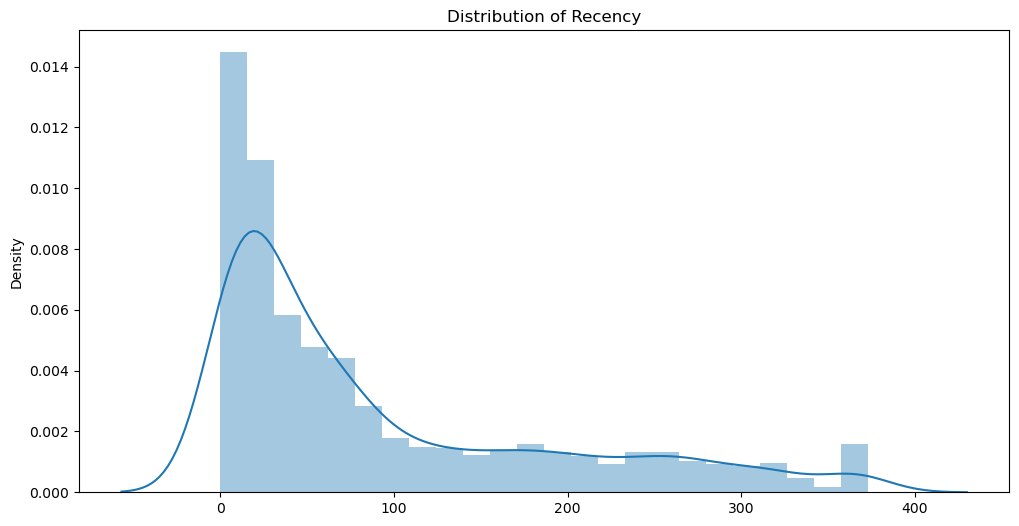

In [88]:
plt.figure(figsize=(12,6))
sns.distplot(x=table['Recency'])
plt.title('Distribution of Recency')

In [92]:
# Descriptive Stats => Frequency
table.Frequency.describe()

count    3921.000000
mean       90.371079
std       217.796155
min         1.000000
25%        17.000000
50%        41.000000
75%        99.000000
max      7847.000000
Name: Frequency, dtype: float64

Text(0.5, 1.0, 'Distribution of Frequency')

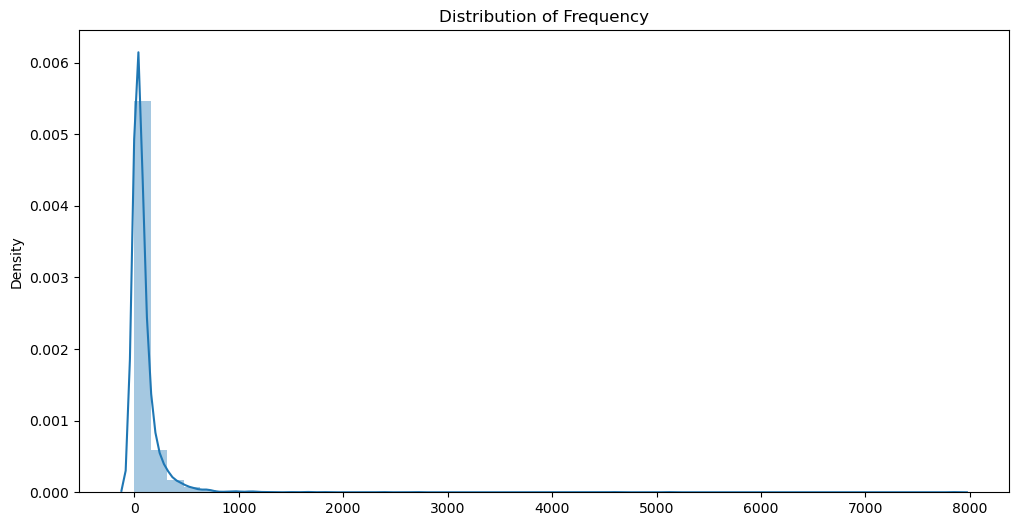

In [93]:
plt.figure(figsize=(12,6))
sns.distplot(x=table['Frequency'])
plt.title('Distribution of Frequency')

In [97]:
# Descriptive Stats => Monetary
table.Monetary.describe()

count      3921.000000
mean       1863.910113
std        7481.922217
min           0.000000
25%         300.040000
50%         651.820000
75%        1575.890000
max      259657.300000
Name: Monetary, dtype: float64

Text(0.5, 1.0, 'Distribution of Monetary')

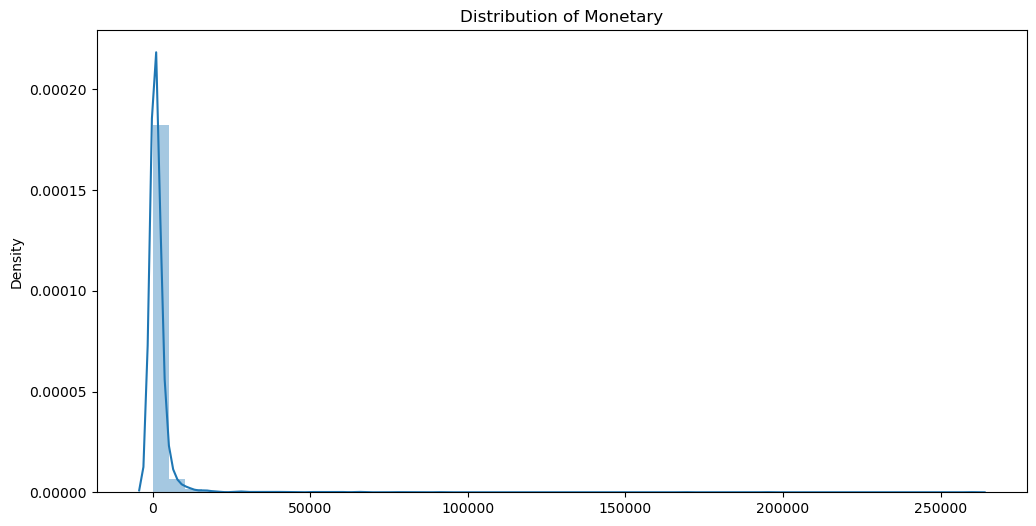

In [98]:
plt.figure(figsize=(12,6))
sns.distplot(x=table['Monetary'])
plt.title('Distribution of Monetary')

In [100]:
# Split the data into 4 segments using Quantiles
quantile = table.quantile(q = [0.25,0.5,0.75])
quantile = quantile.to_dict()
quantile

{'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 142.0},
 'Frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 99.0},
 'Monetary': {0.25: 300.03999999999996, 0.5: 651.8199999999999, 0.75: 1575.89}}

In [101]:
# Converting quantiles to a dictionary

In [68]:
# arguments => (x=vlaue, p=recency,monetary_value, frequency,d = quartiles dict)
# lower the recency, good for the company

def R_value_score(x, p, d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.5]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4

In [102]:
# arguments => (x=vlaue, p=recency,monetary_value, frequency,d = quartiles dict)
# Higher value of frequency and monetary lead to a good consumer.

def FM_value_score(x, p, d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.5]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

In [103]:
# Creating a RFM table for customers
customer_table = table

In [105]:
# assigning the segment numbers to Recency
customer_table['R_quartile'] = customer_table['Recency'].apply(R_value_score, args=('Recency',quantile,))

# assigning the segment numbers to Frequency
customer_table['F_quartile'] = customer_table['Frequency'].apply(FM_value_score, args=('Frequency',quantile,))

# assigning the segment numbers to Monetary value
customer_table['M_quartile'] = customer_table['Monetary'].apply(FM_value_score, args=('Monetary',quantile,))


In [106]:
customer_table.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 3921 entries, 12346.0 to 18287.0
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Recency     3921 non-null   int32  
 1   Frequency   3921 non-null   int64  
 2   Monetary    3921 non-null   float64
 3   R_quartile  3921 non-null   int64  
 4   F_quartile  3921 non-null   int64  
 5   M_quartile  3921 non-null   int64  
dtypes: float64(1), int32(1), int64(4)
memory usage: 199.1 KB


In [107]:
customer_table.head(10)

,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile
CustomerID,,,,,,
12346.0,325,1,77183.60,4,4,1
12747.0,2,103,4196.01,1,1,1
12748.0,0,4596,33719.73,1,1,1
12749.0,3,199,4090.88,1,1,1
12820.0,3,59,942.34,1,2,2
12821.0,214,6,92.72,4,4,4
12822.0,70,46,948.88,3,2,2
12823.0,74,5,1759.50,3,4,1
12824.0,59,25,397.12,3,3,3


In [112]:
# Add a new column to combine RFM score
customer_table['RFM_score'] = customer_table.R_quartile.map(str) + customer_table.F_quartile.map(str) + customer_table.M_quartile.map(str)

In [114]:
# Display RFM scores for each customer

customer_table.head(10)

,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile,RFM_score
CustomerID,,,,,,,
12346.0,325,1,77183.60,4,4,1,441
12747.0,2,103,4196.01,1,1,1,111
12748.0,0,4596,33719.73,1,1,1,111
12749.0,3,199,4090.88,1,1,1,111
12820.0,3,59,942.34,1,2,2,122
12821.0,214,6,92.72,4,4,4,444
12822.0,70,46,948.88,3,2,2,322
12823.0,74,5,1759.50,3,4,1,341
12824.0,59,25,397.12,3,3,3,333


In [123]:
# Display top 25 customers RFM score = 111
customer_table[customer_table['RFM_score'] == '111'].sort_values('Monetary', ascending=False).head(25)

,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile,RFM_score
CustomerID,,,,,,,
18102.0,0,431,259657.30,1,1,1,111
17450.0,8,337,194550.79,1,1,1,111
17511.0,2,963,91062.38,1,1,1,111
16684.0,4,277,66653.56,1,1,1,111
14096.0,4,5111,65164.79,1,1,1,111
13694.0,3,568,65039.62,1,1,1,111
15311.0,0,2379,60767.90,1,1,1,111
13089.0,2,1818,58825.83,1,1,1,111
15769.0,7,130,56252.72,1,1,1,111


In [124]:
# Display top 25 customers by recency
customer_table.sort_values('Recency', ascending=False).head(25)

,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile,RFM_score
CustomerID,,,,,,,
17643.0,373,8,101.55,4,4,4,444
15165.0,373,27,487.75,4,3,3,433
13747.0,373,1,79.60,4,4,4,444
17908.0,373,58,243.28,4,2,4,424
17968.0,373,85,277.35,4,2,4,424
16048.0,373,8,256.44,4,4,4,444
15922.0,373,11,369.50,4,4,3,443
16583.0,373,14,233.45,4,4,4,444
18011.0,373,28,102.79,4,3,4,434


In [125]:
# Display top 25 customers by frequency
customer_table.sort_values('Frequency', ascending=False).head(25)

,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile,RFM_score
CustomerID,,,,,,,
17841.0,1,7847,40991.57,1,1,1,111
14096.0,4,5111,65164.79,1,1,1,111
12748.0,0,4596,33719.73,1,1,1,111
14606.0,1,2700,12156.65,1,1,1,111
15311.0,0,2379,60767.90,1,1,1,111
13089.0,2,1818,58825.83,1,1,1,111
13263.0,1,1677,7454.07,1,1,1,111
14298.0,8,1637,51527.30,1,1,1,111
15039.0,9,1502,19914.44,1,1,1,111


In [126]:
# Display top 25 customers by monetary
customer_table.sort_values('Monetary', ascending=False).head(25)

,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile,RFM_score
CustomerID,,,,,,,
18102.0,0,431,259657.30,1,1,1,111
17450.0,8,337,194550.79,1,1,1,111
16446.0,0,3,168472.50,1,4,1,141
17511.0,2,963,91062.38,1,1,1,111
16029.0,38,242,81024.84,2,1,1,211
12346.0,325,1,77183.60,4,4,1,441
16684.0,4,277,66653.56,1,1,1,111
14096.0,4,5111,65164.79,1,1,1,111
13694.0,3,568,65039.62,1,1,1,111


In [127]:
# Count unique RFM score in the customer table
unique_rfm = customer_table['RFM_score'].nunique()
unique_rfm

61

In [129]:
# Count of each unique RFM score in the customer table
rfm_count = customer_table['RFM_score'].value_counts()

print(f'score count')
print(rfm_count)

score count
111    409
444    343
211    186
433    180
344    168
      ... 
241      7
141      5
431      4
413      4
114      1
Name: RFM_score, Length: 61, dtype: int64


### Data Visualization

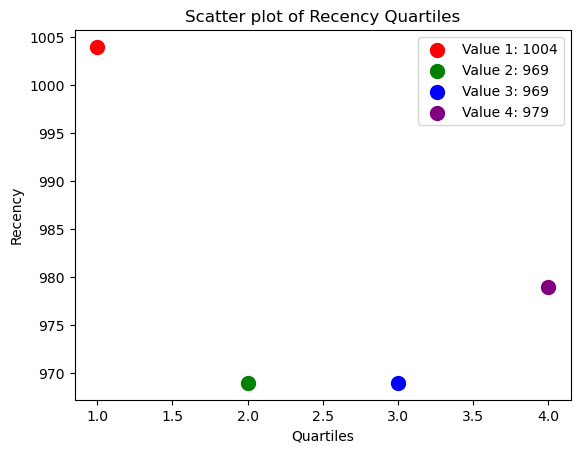

In [133]:
# plotting a scatterplot for the Recency Quartile

# count total number of Recency in each Recency Quartile
value_counts = customer_table['R_quartile'].value_counts().sort_index()

colors = ['red','green','blue','purple']

plt.xlabel('Quartiles')
plt.ylabel('Recency')
plt.title('Scatter plot of Recency Quartiles')

# create scatter plots for each value
for i, (value, count) in enumerate(value_counts.items()):
    plt.scatter(value, count, c=colors[i], s=100, label=f'Value {value}: {count}')

plt.legend()

plt.show()

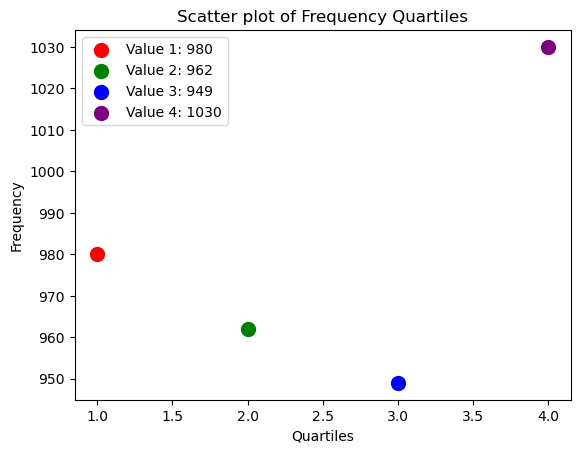

In [135]:
# plotting a scatterplot for the Frequency Quartile

value_counts = customer_table['F_quartile'].value_counts().sort_index()

colors = ['red','green','blue','purple']

plt.xlabel('Quartiles')
plt.ylabel('Frequency')
plt.title('Scatter plot of Frequency Quartiles')

# create scatter plots for each value
for i, (value, count) in enumerate(value_counts.items()):
    plt.scatter(value, count, c=colors[i], s=100, label=f'Value {value}: {count}')

plt.legend()

plt.show()

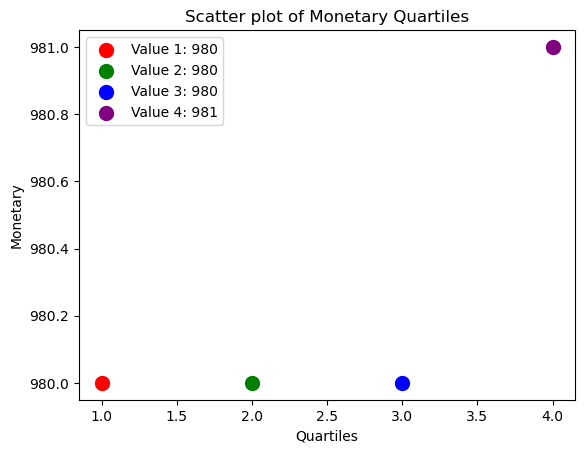

In [136]:
# plotting a scatterplot for the Monetary Quartile

value_counts = customer_table['M_quartile'].value_counts().sort_index()

colors = ['red','green','blue','purple']

plt.xlabel('Quartiles')
plt.ylabel('Monetary')
plt.title('Scatter plot of Monetary Quartiles')

# create scatter plots for each value
for i, (value, count) in enumerate(value_counts.items()):
    plt.scatter(value, count, c=colors[i], s=100, label=f'Value {value}: {count}')

plt.legend()

plt.show()

### Insights

1) Highest number are from United Kingdom.
2) Highest value of Recency is 373 days.
3) Highest value of Frequency is 7847/
4) Highest value of Monetary is 259657.30.
5) Total Unique RFM scores are 61.
6) Top 10 RFM scores & their counts are -

In [144]:
rfm_count = customer_table['RFM_score'].value_counts().head(10)

print(f'score count')
print(rfm_count)

score count
111    409
444    343
211    186
433    180
344    168
222    156
322    142
333    141
122    124
244    112
Name: RFM_score, dtype: int64
